In [1]:
import networkx as nx

G = nx.Graph()

# Computer uses port
# port connects service
# service belongs_to Computer

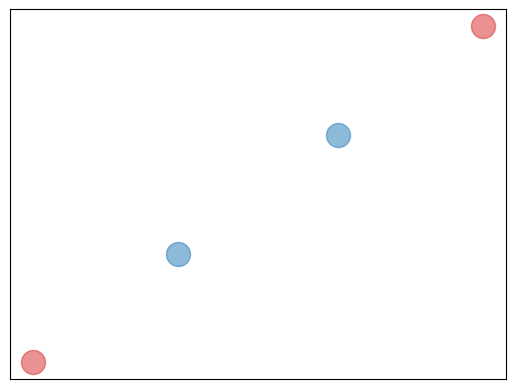

In [2]:
G.add_edge("ComputerA", "PortA")
G.add_edge("PortA", "PortB")
G.add_edge("PortB", "ComputerB")

# Draw Ports
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes
ports = [node for node in G.nodes.keys() if node.startswith("Port")]
computers = [node for node in G.nodes.keys() if node.startswith("Computer")]
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=ports,
    alpha=0.5,
    node_color="tab:blue",
)
# Draw Computers
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=computers,
    alpha=0.5,
    node_color="tab:red",
)

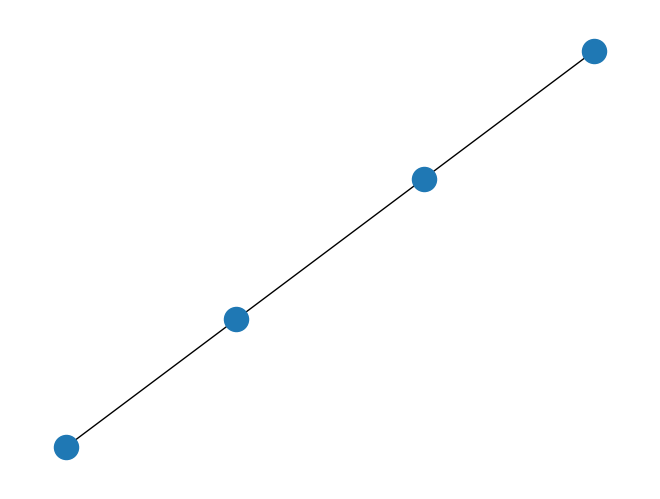

In [3]:
nx.draw(G, pos)

In [13]:
from torch_geometric.data import HeteroData

data = HeteroData()
services = {}
clients = {}
host_map = {}

host_to_client = []
client_to_service = []
service_to_server = []

def get_host(hostIP):
    key = hostIP

    if key in host_map:
        return host_map[key]
    
    host_map[key] = len(host_map)
    return host_map[key]

def get_service(destinationIP, destinationPort):
    key = (destinationIP, destinationPort)

    if key in services:
        return services[key]
    
    services[key] = len(services)
    return services[key]

def get_client(sourceIP, sourcePort):
    key = (sourceIP, sourcePort)

    if key in clients:
        return clients[key]
    
    clients[key] = len(clients)
    return clients[key]

def handle_conn(sourceIP, sourcePort, destinationIP, destinationPort):
    source = get_host(sourceIP)
    client = get_client(sourceIP, sourcePort)
    service = get_service(destinationIP, destinationPort)
    destination = get_host(destinationIP)

    host_to_client.append((source, client))
    client_to_service.append((client, service))
    service_to_server.append((service, destination))

handle_conn("192.168.1.2", 53453, "192.168.1.1", 53)
handle_conn("192.168.1.2", 53452, "192.168.1.1", 53)
handle_conn("192.168.1.3", 53, "192.168.1.1", 53)

In [14]:
print(host_to_client)
print(client_to_service)
print(service_to_server)

[(0, 0), (0, 1), (2, 2)]
[(0, 0), (1, 0), (2, 0)]
[(0, 1), (0, 1), (0, 1)]
